1) Problem Statment

This project understands how the student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental leven of education, Lunch and Test preparation course.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
kp = df.rename(columns={'parental level of education': 'parental_level_of_education', 'test preparation course': 'test_preparation_course', 'math score': 'math_score', 'reading score': 'reading_score', 'writing score': 'writing_score', 'race/ethnicity': 'race_ethnicity'})

In [38]:
kp.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [44]:
kp.to_csv(r'D:\ML-Project\artifacts\data1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [40]:
pc = pd.read_csv(r"D:\ML-Project\Notebook\data\data1.csv")
pc.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
numeric_columns = [num for num in df.columns if df[num].dtype != 'object']
categorical_columns = [num for num in df.columns if df[num].dtype == 'object']

In [11]:
df['total_score'] = df['math score'] +df['reading score'] + df['writing score']
df['average'] = round(df['total_score']/3,2)
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67


In [14]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
maths_full = df[df['math score'] == 100]['average'].count()

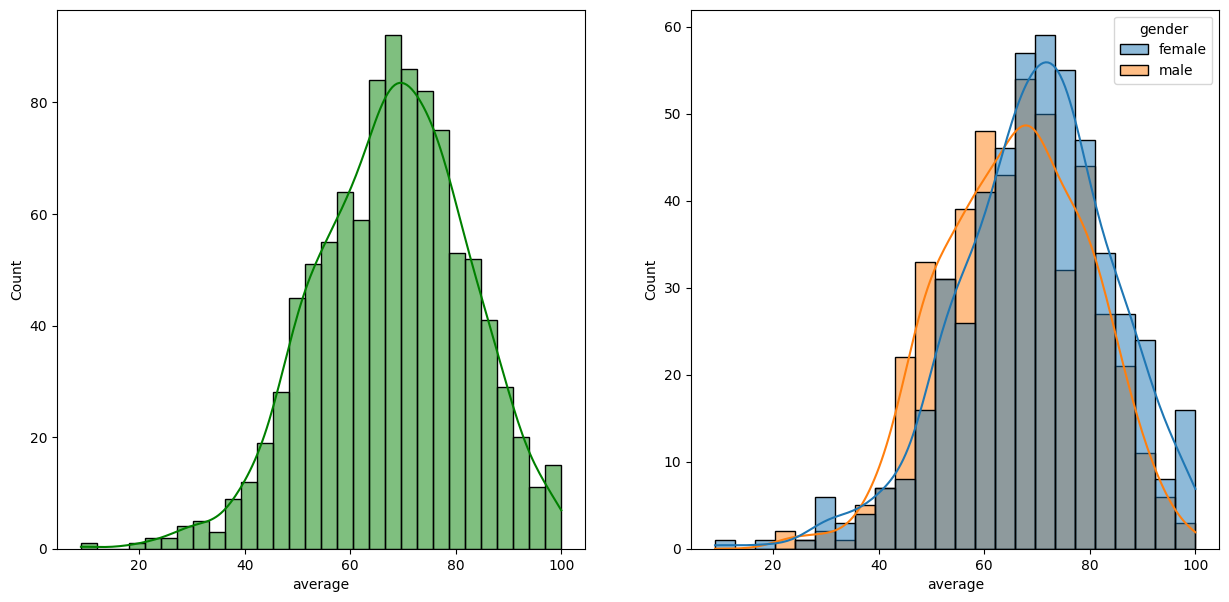

In [28]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True,hue='gender')
plt.show()

<BarContainer object of 2 artists>

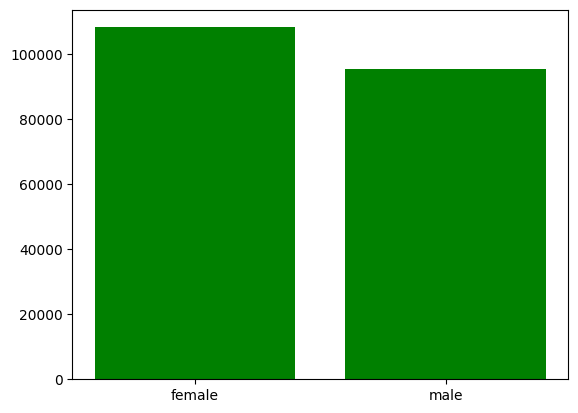

In [37]:
total = df.groupby('gender')['total_score'].sum()
total = total.reset_index()
plt.bar(total['gender'], total['total_score'],color='g')